<a href="https://colab.research.google.com/github/kagankevich/CL/blob/master/kagankevich_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Большая домашка 1: классификация отзывов

## Данные

Скачиваются по [ссылке](https://drive.google.com/open?id=1gJEpwM3zdV5xe9nRU0VwQmGTiOTQdp10). Это отзывы пользователей на фильмы с КиноПоиска.

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('reviews.csv')

In [4]:
df.head()

,label,text
0,1,Эпиграф Добро которое ты делаешь от сердца ты ...
1,1,Теперь это один из моих любимых фильмов в жанр...
2,1,Что скрыто в фильме Лучше не бывает Одна шикар...
3,1,Перед нами очень милое и доброе кино которое л...
4,1,Завязка Мелвин Удал популярный писатель Нет не...


In [0]:
set(df.label)

{-1, 0, 1}

В колонке `label` три класса: положительный (1), нейтральный (0) и отрицательный (-1).

## Baseline

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
!pip install pymorphy2[fast]
import pymorphy2
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from operator import itemgetter
from nltk import word_tokenize
from nltk.corpus import stopwords

     |████████████████████████████████| 51kB 1.9MB/s 
     |████████████████████████████████| 7.1MB 6.1MB/s 
     |████████████████████████████████| 378kB 45.9MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=842398 sha256=6786dad9a083e94e25b3371584e8b23aa01613e491a5356079df28fabdd6bb04
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


In [0]:
vec = CountVectorizer()
bag_of_words = vec.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.label)

In [0]:
nb = MultinomialNB()
clf = nb.fit(X_train, y_train)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.69      0.23      0.34      1058
           0       0.37      0.08      0.13      1390
           1       0.82      0.98      0.89      9178

    accuracy                           0.81     11626
   macro avg       0.63      0.43      0.46     11626
weighted avg       0.76      0.81      0.75     11626



## Задание

Побейте baseline выше как минимум тремя способами.


**Обязательно**:
* попробовать разный препроцессинг (2 балла)
* попробовать разные классификаторы (2 балла)
* поподбирать гиперпараметры классификаторов, можно с использованием GreedSearch (2 балла)
* попробуйте объяснить полученные результаты (2 балла)
* визуализируйте веса признаков для лучшей модели (если лучшая модель не выдаёт коэффициенты признаков, возьмите логистическую регрессию); какие признаки оказались самыми значимыми? (2 балла)

Если вы перебрали уже много разных способов и выполнили все обязательные критерии, но побить baseline тремя способами так и не получилось, не беспокойтесь. Главное -- полнота попыток :)

Good luck and have fun! ;)

In [0]:
# видим, что текст уже без знаков препинания
df.iloc[10].text

'Казалось бы жизнь интроверта Мелвилла Юделла ничем не примечательна живет один ненавидит людей пишет книги и т п Он не пользовался популярностью и симпатией у соседей у окружающий людей из-за своей мизантропической натуры однако с появлением маленького друга который прервал его одиночество Мелвилл стал меняться к лучшему История фильма не особо оригинальная ибо рассказы про мизантропов и замкнутых людей есть чуть ли не в каждой психологической драме но раскрывается она не так сполна как в этой ленте Казалось бы этот мужчина проживет всю жизнь в скукоте и ненависти но с появлением маленького песика Верделла к которому он привязался открыв для себя новые чувства и со временем поняв что жизнь за пределами одиночества полна красок Выбравшись из душевного заточения наш герой ближе знакомится со своим соседом-геем который остался инвалидом после несчастного случая и с официанткой которая хочет вылечить тяжело больного сына и рассеивает все их комплексы и проблемы излечив их путем добра и лю

## Tfidf + Naive Bayes без препроцессинга

In [0]:
# tfidf без препроцессинга
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer


In [0]:
vectorizer = TfidfVectorizer()
tfidf_vecs = vectorizer.fit_transform(df.text)


In [9]:
tfidf_vecs

<46501x369844 sparse matrix of type '<class 'numpy.float64'>'
	with 11693675 stored elements in Compressed Sparse Row format>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vecs, df.label)

In [11]:
nb_tfidf = MultinomialNB() 
nb_tfidf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
print(classification_report(y_test, nb_tfidf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1079
           0       0.00      0.00      0.00      1410
           1       0.79      1.00      0.88      9137

    accuracy                           0.79     11626
   macro avg       0.26      0.33      0.29     11626
weighted avg       0.62      0.79      0.69     11626



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Классификатор сработал только по одному классу - в чем может быть проблема?**

## CountVectorizer + Logistic Regression без препроцессинга

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bow, df.label)
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(classification_report(y_test, clf.predict(X_test))) # лучше, чем baseline

              precision    recall  f1-score   support

          -1       0.61      0.53      0.57      1075
           0       0.35      0.28      0.31      1380
           1       0.89      0.94      0.91      9171

    accuracy                           0.82     11626
   macro avg       0.62      0.58      0.60     11626
weighted avg       0.80      0.82      0.81     11626



In [0]:
vectorizer.vocabulary_

## Tfidf Vectorizer + Logistic Regression без препроцессинга

In [0]:
vectorizer = TfidfVectorizer()
bow = vectorizer.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bow, df.label)
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(classification_report(y_test, clf.predict(X_test))) 

              precision    recall  f1-score   support

          -1       0.73      0.40      0.52      1125
           0       0.49      0.12      0.19      1397
           1       0.84      0.99      0.91      9104

    accuracy                           0.83     11626
   macro avg       0.69      0.50      0.54     11626
weighted avg       0.79      0.83      0.79     11626



Результат лучше, чем baseline, и примерно такой же, как в CountVectorizer + Logistic Regression без препроцессинга. 

## Препроцессинг

### 1. попробуем просто разбить на биграммы и классифицировать baseline-способом


In [0]:
vec_bigrams = CountVectorizer(ngram_range=(2, 2)) #  делаем биграммы
bow_bigrams = vec_bigrams.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bow_bigrams, df.label)
nb = MultinomialNB()
clf = nb.fit(X_train, y_train)

In [0]:
print(classification_report(y_test, clf.predict(X_test))) # результаты ухудшились

              precision    recall  f1-score   support

          -1       0.49      0.06      0.11      1090
           0       0.18      0.07      0.10      1428
           1       0.79      0.96      0.87      9108

    accuracy                           0.76     11626
   macro avg       0.49      0.36      0.36     11626
weighted avg       0.69      0.76      0.70     11626



### 2. попробуем лемматизировать с помощью Pymorphy


In [8]:
#nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:

morph_analyzer = pymorphy2.MorphAnalyzer()
#russian_stopwords = stopwords.words('russian')

# функция для лемматизации
def preprocess_lemmatize(text):
    
    text_preprocessed_tokenized = []
        
    clean_words = [word for word in word_tokenize(text) if word]
    clean_words = [word.lower() for word in clean_words if word]
 #   clean_words = [word for word in clean_words if word not in russian_stopwords]
        
    clean_lemmas = [morph_analyzer.parse(word)[0].normal_form for word in clean_words]
        
    text_preprocessed_tokenized.extend(clean_lemmas)

    return text_preprocessed_tokenized

In [0]:
# для лемм используем TfidfVectorizer

lemmas_vectorizer = TfidfVectorizer(tokenizer=preprocess_lemmatize)
lemmas_bow = lemmas_vectorizer.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(lemmas_bow, df.label)

In [13]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print(classification_report(y_test, clf.predict(X_test))) # самый лучший результат пока

              precision    recall  f1-score   support

          -1       0.73      0.49      0.59      1079
           0       0.49      0.17      0.25      1382
           1       0.86      0.98      0.92      9165

    accuracy                           0.84     11626
   macro avg       0.70      0.55      0.59     11626
weighted avg       0.81      0.84      0.81     11626



**Результаты после лемматизации**

**Tfidf vectorizer**
              
              precision    recall  f1-score   support

          -1       0.74      0.50      0.60      1121
           0       0.45      0.15      0.22      1388
           1       0.86      0.98      0.92      9117

    accuracy                           0.84     11626
    macro avg       0.68      0.54      0.58     11626
    weighted avg       0.80      0.84      0.80     11626

**Count Vectorizer**
              
              precision    recall  f1-score   support

          -1       0.65      0.55      0.60      1092
           0       0.38      0.29      0.33      1355
           1       0.90      0.94      0.92      9179

    accuracy                           0.83     11626
    macro avg       0.64      0.59      0.61     11626
    weighted avg       0.81      0.83      0.82     11626

### анализ результатов

In [34]:
# print features here
lemmas_vectorizer.vocabulary_

{'эпиграф': 143546,
 'добро': 31315,
 'который': 52321,
 'ты': 126646,
 'делать': 28454,
 'от': 80847,
 'сердце': 111469,
 'всегда': 19195,
 'себя': 110722,
 'литр': 56907,
 'наш': 69777,
 'толстой': 124255,
 'думать': 33494,
 'я': 144546,
 'не': 69853,
 'погрешить': 89091,
 'против': 99463,
 'истина': 43694,
 'если': 34791,
 'сказать': 112650,
 'что': 139038,
 'хороший': 135921,
 'в': 13793,
 'это': 144010,
 'фильм': 131794,
 '-': 0,
 'собачка': 115079,
 'оскар': 80323,
 'она': 79275,
 'прекрасный': 95664,
 'оригинальный': 80018,
 'и': 40666,
 'достигнуть': 32428,
 'такой': 122076,
 'вершина': 15307,
 'актёрский': 2977,
 'мастерство': 60894,
 'к': 44248,
 'смочь': 114672,
 'дотянуться': 32526,
 'даже': 26840,
 'джек': 29719,
 'николсон': 74773,
 'а': 1363,
 'как': 44593,
 'мы': 66591,
 'весь': 15421,
 'известно': 41215,
 'план': 87461,
 'ещё': 34878,
 'тот': 124720,
 'красавчик': 52732,
 'вдруг': 14648,
 'вы': 19963,
 'на': 67138,
 'минутка': 63593,
 'прийти': 96615,
 'голова': 24404,

In [0]:
# function to get index and feature
index_to_word = {
    ind: word
    for (word, ind)
    in lemmas_vectorizer.vocabulary_.items()
    }

In [19]:
clf.coef_.shape

(3, 145142)

In [18]:
clf.classes_

array([-1,  0,  1])

In [36]:
# Класс отрицательных отзывов - первые 20 коэффициентов
top_features = sorted(enumerate(clf.coef_[0]), key=lambda pair: pair[1], reverse=True)[:20]
for index, value in top_features:
  print(index_to_word[index], index)

скучный 113551
зачем 39147
ничто 75025
единственный 34516
разочарование 102698
никакой 74704
нет 73933
видимо 16173
вообще 18155
откровенно 81401
скучно 113539
пустой 100839
разочаровать 102707
вместо 17036
бред 11880
унылый 128971
глупый 23956
абсолютно 1544
ужасный 127935
пытаться 101086


In [37]:
# Класс отрицательных отзывов - последние 20 коэффициентов
top_features = sorted(enumerate(clf.coef_[0]), key=lambda pair: pair[1])[:20]
for index, value in top_features:
  print(index_to_word[index])

каждый
жизнь
отличный
очень
отлично
он
немного
замечательный
потрясать
приятно
роль
некоторый
приятный
целое
особенно
несмотря
свой
стоить
прекрасный
место


In [38]:
# Класс нейтральных отзывов - первые 20 коэффициентов
top_features = sorted(enumerate(clf.coef_[1]), key=lambda pair: pair[1], reverse=True)[:20]
for index, value in top_features:
  print(index_to_word[index])

нейтральный
неплохой
но
как-то
целое
сторона
увы
претензия
слишком
всё-таки
чего-то
хватать
ностальгия
слабый
ожидать
разок
оценивать
поэтому
вот
концовка


In [39]:
# Класс нейтральных отзывов - последние 20 коэффициентов
top_features = sorted(enumerate(clf.coef_[1]), key=lambda pair: pair[1])[:20]
for index, value in top_features:
  print(index_to_word[index])

из
шедевр
это
рекомендовать
обычно
юмор
приключение
один
абсолютно
небо
написать
который
настолько
достойный
важный
минута
звучать
безумный
фрэнк
ещё


In [40]:
# Класс положительных отзывов - первые 20 коэффициентов
top_features = sorted(enumerate(clf.coef_[2]), key=lambda pair: pair[1], reverse=True)[:20]
for index, value in top_features:
  print(index_to_word[index])

каждый
отличный
очень
прекрасный
великолепный
отлично
потрясать
один
замечательный
настоящий
являться
свой
однозначно
шикарный
рекомендовать
идеальный
он
дыхание
прекрасно
юмор


In [41]:
# Класс положительных отзывов - последние 20 коэффициентов
top_features = sorted(enumerate(clf.coef_[2]), key=lambda pair: pair[1])[:20]
for index, value in top_features:
  print(index_to_word[index])

скучный
увы
зачем
ничто
никакой
скучно
идея
сожаление
плохой
видимо
неплохой
разочарование
предсказуемый
пустой
не
откровенно
непонятно
нейтральный
вообще
слишком


### confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


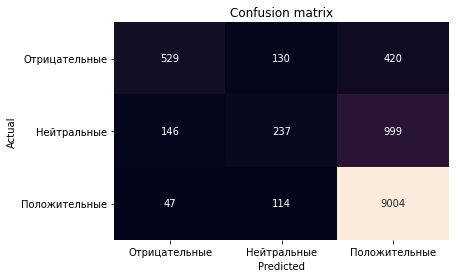

In [32]:
categories = ['Отрицательные', 'Нейтральные', 'Положительные']
sns.heatmap(data=confusion_matrix(y_test, clf.predict(X_test)), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Результаты:**
  

1.   Получены хорошие результаты классификации положительных отзывов.
2.   Большинство по факту нейтральных отзывов классификатор отнес к положительным. Глядя на топ-20 признаков из нейтральных отзывов, это неудивительно, но не понятно, как можно это улучшить. 
3.  Большая доля отрицательных отзывов была классифицирована как положительные, при том, что топ-признаки выглядят довольно однозначно. По всей видимости, в большой части отрицательных отзывов таких однозначных признаков нет. 



## Попробуем еще классификаторы на лемматизированных токенах

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### дерево решений

In [0]:
# дерево решений
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
print(classification_report(y_test, clf_tree.predict(X_test))) #

              precision    recall  f1-score   support

          -1       0.25      0.23      0.24      1117
           0       0.19      0.18      0.18      1409
           1       0.83      0.84      0.83      9100

    accuracy                           0.70     11626
   macro avg       0.42      0.42      0.42     11626
weighted avg       0.69      0.70      0.70     11626



### случайный лес

In [0]:
# случайный лес
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
print(classification_report(y_test, clf_forest.predict(X_test))) #

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1117
           0       0.00      0.00      0.00      1409
           1       0.78      1.00      0.88      9100

    accuracy                           0.78     11626
   macro avg       0.26      0.33      0.29     11626
weighted avg       0.61      0.78      0.69     11626



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [0]:
# наивный байес
lemmas_nb_vect = CountVectorizer(tokenizer=preprocess_lemmatize)
lemmas_nb_bow = lemmas_nb_vect.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(lemmas_nb_bow, df.label)
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
print(classification_report(y_test, clf_nb.predict(X_test))) 

              precision    recall  f1-score   support

          -1       0.62      0.45      0.52      1119
           0       0.35      0.22      0.27      1393
           1       0.87      0.95      0.90      9114

    accuracy                           0.81     11626
   macro avg       0.61      0.54      0.56     11626
weighted avg       0.78      0.81      0.79     11626



## Grid Search - Подбор параметров логистической регресии

Возьмем наилучший из полученных пока результатов (лемматизация + tfifd vectorizer + логистическая регрессия) и попробуем подобрать параметры регрессии

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
clf_optimized = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
clf_optimized.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(classification_report(y_test, clf_optimized.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.74      0.49      0.59      1117
           0       0.53      0.16      0.25      1409
           1       0.86      0.99      0.92      9100

    accuracy                           0.84     11626
   macro avg       0.71      0.55      0.59     11626
weighted avg       0.81      0.84      0.81     11626



**Вывод: по сравнению с настройками по умолчанию результат не улучшился**

### Бонус
(+2 балла к основному заданию; оценка за всё задание может быть выше 10)

Придумайте ещё 2-3 осмысленных споцоба визуализации данных или результатов. Добавьте их ниже или в текст основного задания. и сошлитесь на них здесь.